#### First, run following cell to install required libraries

In [17]:
%pip install psf
%pip install pypher
%pip install opencv-python
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import cv2
import numpy as np
from numpy.fft import fft2
from numpy.fft import ifft2
from numpy.matlib import tile
from matplotlib import pyplot as plt
from pypher.pypher import psf2otf
import time
from matplotlib import pyplot as plt

###### PLEASE change images_path to images file location which is in .zip file.

In [9]:
images_path = r"C:\Users\Salim\Desktop\Readme\CENG303-Group1-Project"

(494, 475, 3)

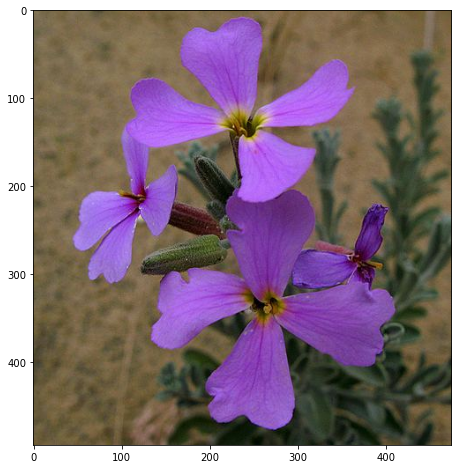

In [10]:
images_path += '\\Images\\'
img = cv2.imread(images_path+'pflower.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(1,figsize=(8,8))
plt.imshow(gray)
gray.shape

In [11]:
def L0Smoothing(image, lamb = 2e-2, kappa = 2.0,betaMax = 1e5,timeMeasure = False):
    
    start_time = time.time()
    S = image/255;
    
    fx = np.array([[1,-1]])
    fy = np.array([[1],[-1]])
    
    [N,M,D] = S.shape #how many pixel? Pixel is our n. D(which is 3 ) our Red Green Blue Layers. NxM is our resolution
    sizeI2D = [N,M]
    
    otfFx = psf2otf(fx,(N,M))
    otfFy = psf2otf(fy,sizeI2D)
    
    Normin1 = fft2(S.T).T
    Denormin2 = np.abs(otfFx)**2 + np.abs(otfFy)**2
    
    if D > 1:
        Denormin2 = np.resize(Denormin2,Denormin2.shape+(1,))
        Denormin2 = tile(Denormin2,(1,1,3))
        
    beta = 2*lamb
    while beta < betaMax:
        Denormin = 1 + beta*Denormin2
        h = np.append(np.diff(S,1,1), S[:,[0],:] - S[:,[-1],:],axis=1)
        v = np.append(np.diff(S,1,0), S[[0],:,:] - S[[-1],:,:],axis=0)
        
        if D == 1:
            t = (h**2+v**2)<lamb/beta
        else:
            t = np.sum((h**2+v**2),2)<lamb/beta;
            t.resize(t.shape+(1,))                         
            t = tile(t,(1,1,D));
        h[t] = 0
        v[t] = 0
        Normin2 = np.append(h[:,[-1],:]-h[:,[0],:], -np.diff(h,1,1),axis=1)
        Normin2 = Normin2 + np.append(v[[-1],:,:]-v[[0],:,:], -np.diff(v,1,0),axis=0)

        
        FS = (Normin1 + beta*fft2(Normin2.T).T)/Denormin;
        S = np.real(ifft2(FS.T).T)
        
        beta = beta*kappa;
    
    if timeMeasure == True:
        cost = (time.time() - start_time)
        return S, cost
    return S
    

In [12]:
S,cost = L0Smoothing(gray,timeMeasure=True)
print("Done")
print(f"--- {cost:3.4} seconds ---" )

Done
--- 3.481 seconds ---


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


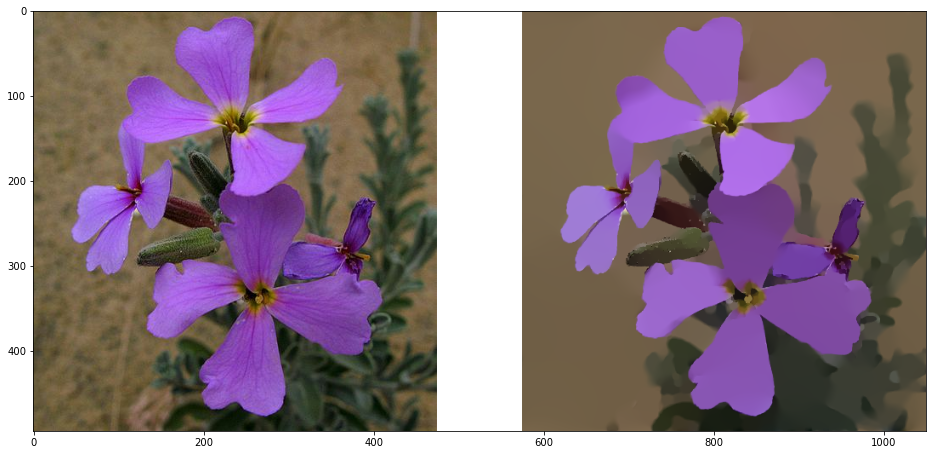

In [13]:
plt.figure(2,figsize=(16,8))
test = np.concatenate([gray/255, 255*np.ones((S.shape[0],100,3)) ,S], 1)
plt.imshow(test)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


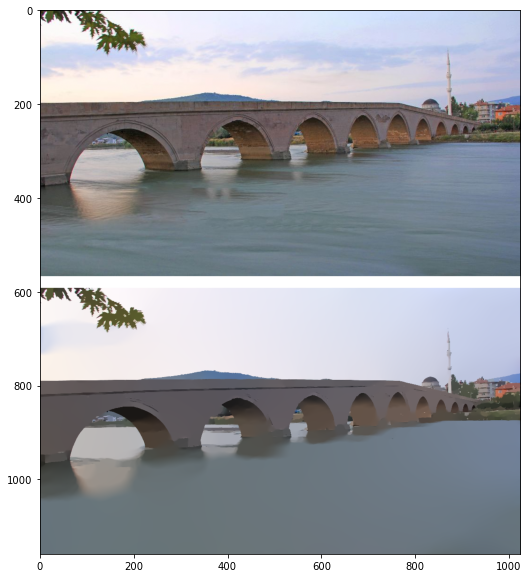

In [14]:
img = cv2.imread(images_path+'osmancik.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

S= L0Smoothing(gray,lamb=2e-2)

plt.figure(2,figsize=(16,10))
test = np.concatenate([gray/255, 255*np.ones((25,S.shape[1],3)) ,S], 0)
plt.imshow(test)
plt.show()

### Proposed complexity is 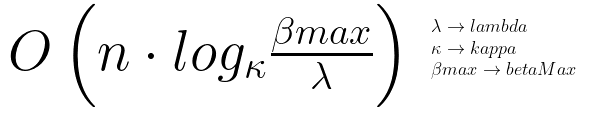

### Calculation


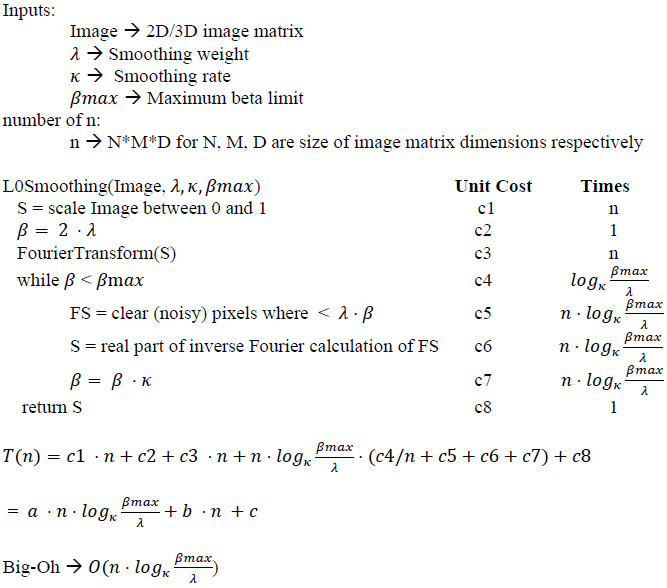

# Test Cases to Justify Complexity

## Test Case 1: in different number of n's but fixed betaMax, kappa and lambda

Linear time consumption and relatively close n/s(number of pixel/second) proportions are expected. Note that, these images are not as big as to take same proportion of n/s because of limited test resources(like CPU) but it will close to same proportion when n is increase

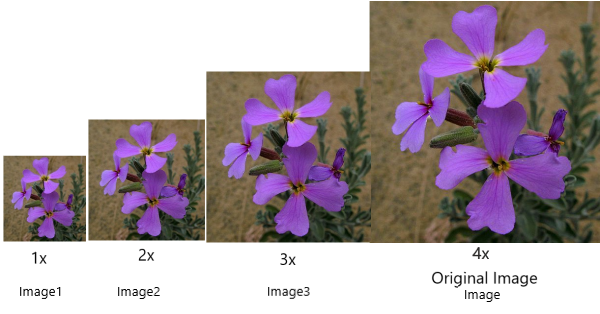

In [125]:
#Preparation of test environment

avg = [0.0, 0.0, 0.0,0.0]
testNumber = 1000

image1 = cv2.imread(images_path+'pflower1.jpg')
rgb1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)

image2 = cv2.imread(images_path+'pflower2.jpg')
rgb2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

image3 = cv2.imread(images_path+'pflower3.jpg')
rgb3 = cv2.cvtColor(image3, cv2.COLOR_BGR2RGB)

image = cv2.imread(images_path+'pflower.jpg')
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

print("Number of n's for images:")
print(f"For image1 -->\t{np.product(rgb1.shape):-7}")
print(f"For image2 -->\t{np.product(rgb2.shape):-7}")
print(f"For image3 -->\t{np.product(rgb3.shape):-7}")
print(f"For image  -->\t{np.product(rgb.shape):-7} (original size)")

Number of n's for images:
For image1 -->	  88200
For image2 -->	 175617
For image3 -->	 350745
For image  -->	 703950 (original size)


WARNING!! : Following code block may take a lot of time! 
See the previous results before running

In [126]:
print("Test is starting...")
print("% 0",end='')
for i in range(1,testNumber+1):
    S,cost = L0Smoothing(rgb1,timeMeasure=True)
    avg[1] = (avg[1]*(i-1)+cost)/i
    
    S,cost = L0Smoothing(rgb2,timeMeasure=True)
    avg[2] = (avg[2]*(i-1)+cost)/i
    
    S,cost = L0Smoothing(rgb3,timeMeasure=True)
    avg[3] = (avg[3]*(i-1)+cost)/i
    
    S,cost = L0Smoothing(rgb,timeMeasure=True)
    avg[0] = (avg[0]*(i-1)+cost)/i
    
    print("\r%",int(i/testNumber*100),end='')

print("\nTest has done")

Test is starting...
% 100
Test has done


In [11]:
print(f"\nAverage times ")
print(f"For image1(1x): {avg[1]:3.3}")
print(f"For image2(2x): {avg[2]:3.3}")
print(f"For image3(3x): {avg[3]:3.3}")
print(f"For image(4x) : {avg[0]:3.3}")
n1 = np.product(image1.shape)
n2 = np.product(image2.shape)
n3 = np.product(image3.shape)
n = np.product(image.shape)
print("----------------------------------------------------")
print("Number of processed n per second (n/s):")
print(f"For image1(1x) -->{(n1/avg[1])/1000:2.2f} x 10³ n/s")
print(f"For image2(2x) -->{(n2/avg[2])/1000:2.2f} x 10³ n/s")
print(f"For image3(3x) -->{(n3/avg[3])/1000:2.2f} x 10³ n/s")
print(f"For image(4x)  -->{(n/avg[0])/1000:2.2f} x 10³ n/s")


Average times 
For image1(1x): 0.401
For image2(2x): 1.44
For image3(3x): 3.13
For image(4x) : 4.19
----------------------------------------------------
Number of processed n per second (n/s):
For image1(1x) -->219.92 x 10³ n/s
For image2(2x) -->121.79 x 10³ n/s
For image3(3x) -->111.92 x 10³ n/s
For image(4x)  -->168.20 x 10³ n/s


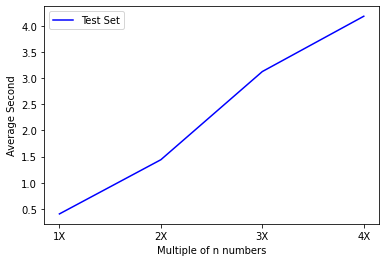

In [12]:
plt.plot(range(1,5,1), np.append(avg[1:4],avg[0]),'b')
plt.xlabel('Multiple of n numbers')
plt.ylabel('Average Second')
plt.xticks([1,2,3,4],['1X','2X','3X','4X'])
plt.legend(['Test Set', 'Training Set'])

###### As you can see on the results, proportions support O(n) part of proposed complexity under constant betaMax, kappa and lambda values

## Test Case 2: in fixed number of n's, lambda and kappa but different betaMax values

WARNING!! : Following code block may take a lot of time! 
See the previous results before running

In [153]:
testNumber = 100
betaAvg = [0.0,0.0,0.0]

print("Test is starting...")
print("% 0",end='')

for i in range(1,testNumber+1):

    S,cost = L0Smoothing(rgb1,kappa = 2,betaMax=2**5,lamb = 1,timeMeasure=True)
    betaAvg[0] = (betaAvg[0]*(i-1)+cost)/i
    
    S,cost = L0Smoothing(rgb1,kappa = 2,betaMax=2**25,lamb = 1,timeMeasure=True)
    betaAvg[1] = (betaAvg[1]*(i-1)+cost)/i
    
    S,cost = L0Smoothing(rgb1,kappa = 2,betaMax=2**225,lamb = 1,timeMeasure=True)
    betaAvg[2] = (betaAvg[2]*(i-1)+cost)/i
        
    print(f"\r% {i/testNumber*100:3.1f}",end='')

print("\nTest has done")

Test is starting...
% 100.0
Test has done


### Expected proportions

##### test1  $\beta max =\log_\kappa \frac{\beta max}{\lambda}$

##### test2 $\beta max$ = 5 * test1

##### test3 $\beta max$ = 25*test2

In [154]:
print(f"\nAverage times ")
print(f"For betaMax: {betaAvg[0]:3.3}")
print(f"For betaMax: {betaAvg[1]:3.3}")
print(f"For betaMax: {betaAvg[2]:3.3}")

n = np.product(image.shape)
print("--------------------------------------------")
print(f"Test1  \t\t-->{1:2.2f} X")
print(f"Test2 / Test1 is -->{betaAvg[1]/betaAvg[0]:2.2f}")
print(f"Test3 / Test2 is -->{betaAvg[2]/betaAvg[1]:2.2f}")


Average times 
For betaMax: 0.0645
For betaMax: 0.327
For betaMax: 8.33
--------------------------------------------
Test1  		-->1.00 X
Test2 / Test1 is -->5.08
Test3 / Test2 is -->25.42


##### As you can see, results support $O(\log_\kappa \frac{\beta max}{\lambda})$  part of proposed complexity under constant n value

### Since both test cases support the proposed complexity, we can say that complexity of algorithme is justified